In [162]:
import pickle
# gensim
from gensim import corpora, models, similarities, matutils
# sklearn
from sklearn import datasets
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
# logging for gensim (set to INFO)
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [163]:
with open("zillow_df.pkl", 'rb') as picklefile: 
    df = pickle.load(picklefile)

In [164]:
df.head()

,address,city,state,zip,price,sqft,bedrooms,bathrooms,days_on_zillow,sale_type,url,description
0,20014 59th Ave SE,Snohomish,WA,98296,1868000,7359,4,6,NA,House For Sale,http://www.zillow.com/homes/for_sale//homedeta...,Walk-through Video: www.seetheproperty.com/250...
1,13506 70th Dr SE,Snohomish,WA,98296,674950,2957,4,3,3,House For Sale,http://www.zillow.com/homes/for_sale//homedeta...,Wonderful Highlands East home that has been up...
2,14313 214th St SE,Snohomish,WA,98296,546000,2237,3,3,6,Auction,http://www.zillow.com/homes/for_sale//homedeta...,Investor opportunity! This property is being o...
3,11621 60th Ave SE,Snohomish,WA,98296,489950,2213,4,3,4,House For Sale,http://www.zillow.com/homes/for_sale//homedeta...,"Newer 4 br, 2.5 bths 2-story backs to greenbel..."
4,13325 81st Ave SE,Snohomish,WA,98296,720000,3091,4,3,12,House For Sale,http://www.zillow.com/homes/for_sale//homedeta...,Beautiful Murray Franklin re-sale in the desir...


In [165]:
desc = df['description']

In [166]:
desc[0]

"Walk-through Video: www.seetheproperty.com/250910    Just a hop over the border to Snohomish County, but still in Northshore School District! A meandering driveway is the grand approach to this superbly-built 5832 sq ft home with 1527 sq ft guest house/apartment, that will make every covered porch-lovers heart skip a beat. Enjoy country living with elegance and charm, in a pastoral setting. A stroll around the shy 5-acre parcel reveals surprises, too, including an outdoor fireplace, sport court, and a barn equipped with chandeliers, perfect for a large gathering or for your mini-farm. The main home has 4 bedrooms + bonus + a finished room with closet (alternate bedroom). The apartment has 3 finished rooms that can be used as bedrooms. There's also a basement level workout room and storage roomExcellent for VRBO, Airbnb or potential retreat/event center.Convenient location is close to Woodinville, Canyon Park and Seattle.Just a few minutes to Costco and Woodinville's Brightwater Park, 

In [167]:
# Create a CountVectorizer for parsing/counting words
count_vectorizer = CountVectorizer(ngram_range=(1, 2),  
                                   stop_words='english', token_pattern="\\b[a-z][a-z]+\\b")
count_vectorizer.fit(desc)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='\\b[a-z][a-z]+\\b',
        tokenizer=None, vocabulary=None)

In [168]:
counts = count_vectorizer.transform(desc).transpose()

In [169]:
counts.shape

(77242, 2639)

In [170]:
# Convert sparse matrix of counts to a gensim corpus
corpus = matutils.Sparse2Corpus(counts)

In [171]:
id2word = dict((v, k) for k, v in count_vectorizer.vocabulary_.items())

In [172]:
len(id2word)

77242

In [176]:
# Create lda model (equivalent to "fit" in sklearn)
lda = models.LdaModel(corpus=corpus, num_topics=6, minimum_probability=.03, id2word=id2word, passes=10)

2018-03-01 13:16:08,079 : INFO : using symmetric alpha at 0.16666666666666666
2018-03-01 13:16:08,084 : INFO : using symmetric eta at 0.16666666666666666
2018-03-01 13:16:08,101 : INFO : using serial LDA version on this node
2018-03-01 13:16:10,377 : INFO : running online (multi-pass) LDA training, 6 topics, 10 passes over the supplied corpus of 2639 documents, updating model once every 2000 documents, evaluating perplexity every 2639 documents, iterating 50x with a convergence threshold of 0.001000
2018-03-01 13:16:10,434 : INFO : PROGRESS: pass 0, at document #2000/2639
2018-03-01 13:16:13,822 : INFO : merging changes from 2000 documents into a model of 2639 documents
2018-03-01 13:16:14,239 : INFO : topic #3 (0.167): 0.007*"home" + 0.004*"room" + 0.003*"great" + 0.003*"lot" + 0.003*"large" + 0.003*"floor" + 0.002*"level" + 0.002*"property" + 0.002*"master" + 0.002*"open"
2018-03-01 13:16:14,242 : INFO : topic #5 (0.167): 0.005*"home" + 0.004*"new" + 0.004*"lot" + 0.004*"room" + 0.00

2018-03-01 13:16:28,941 : INFO : topic #3 (0.167): 0.007*"home" + 0.006*"lot" + 0.004*"property" + 0.004*"acres" + 0.003*"great" + 0.003*"build" + 0.003*"water" + 0.003*"location" + 0.002*"area" + 0.002*"dream"
2018-03-01 13:16:28,946 : INFO : topic #5 (0.167): 0.006*"lot" + 0.004*"homes" + 0.004*"home" + 0.004*"property" + 0.003*"new" + 0.003*"water" + 0.003*"lake" + 0.002*"community" + 0.002*"location" + 0.002*"views"
2018-03-01 13:16:28,951 : INFO : topic diff=0.370822, rho=0.481153
2018-03-01 13:16:29,017 : INFO : PROGRESS: pass 3, at document #2000/2639
2018-03-01 13:16:30,572 : INFO : merging changes from 2000 documents into a model of 2639 documents
2018-03-01 13:16:31,450 : INFO : topic #0 (0.167): 0.012*"room" + 0.010*"home" + 0.008*"kitchen" + 0.006*"large" + 0.006*"master" + 0.006*"new" + 0.005*"bath" + 0.005*"living" + 0.004*"floor" + 0.004*"great"
2018-03-01 13:16:31,452 : INFO : topic #2 (0.167): 0.007*"home" + 0.003*"new" + 0.002*"area" + 0.002*"living" + 0.002*"kitchen"

2018-03-01 13:16:42,721 : INFO : topic #4 (0.167): 0.018*"properties" + 0.016*"auction" + 0.014*"com" + 0.014*"sale" + 0.013*"auction com" + 0.013*"property" + 0.007*"details" + 0.007*"foreclosure" + 0.005*"opportunity" + 0.004*"search"
2018-03-01 13:16:42,725 : INFO : topic #5 (0.167): 0.005*"lot" + 0.004*"homes" + 0.004*"property" + 0.004*"home" + 0.003*"lake" + 0.003*"new" + 0.003*"water" + 0.003*"views" + 0.003*"community" + 0.002*"location"
2018-03-01 13:16:42,729 : INFO : topic diff=0.179677, rho=0.369623
2018-03-01 13:16:42,796 : INFO : PROGRESS: pass 6, at document #2000/2639
2018-03-01 13:16:44,100 : INFO : merging changes from 2000 documents into a model of 2639 documents
2018-03-01 13:16:44,457 : INFO : topic #3 (0.167): 0.007*"home" + 0.007*"lot" + 0.005*"property" + 0.004*"acres" + 0.004*"build" + 0.004*"water" + 0.004*"great" + 0.003*"acre" + 0.003*"dream" + 0.003*"location"
2018-03-01 13:16:44,460 : INFO : topic #4 (0.167): 0.017*"properties" + 0.014*"auction" + 0.013*"c

2018-03-01 13:16:54,062 : INFO : topic #0 (0.167): 0.011*"room" + 0.011*"home" + 0.008*"kitchen" + 0.007*"large" + 0.007*"new" + 0.006*"master" + 0.006*"bath" + 0.005*"living" + 0.005*"floor" + 0.004*"garage"
2018-03-01 13:16:54,065 : INFO : topic #4 (0.167): 0.018*"properties" + 0.016*"auction" + 0.014*"com" + 0.014*"sale" + 0.014*"auction com" + 0.013*"property" + 0.007*"details" + 0.007*"foreclosure" + 0.005*"opportunity" + 0.005*"search"
2018-03-01 13:16:54,068 : INFO : topic #3 (0.167): 0.008*"lot" + 0.007*"home" + 0.006*"property" + 0.005*"acres" + 0.004*"build" + 0.004*"water" + 0.004*"great" + 0.003*"acre" + 0.003*"dream" + 0.003*"location"
2018-03-01 13:16:54,072 : INFO : topic diff=0.134135, rho=0.311294
2018-03-01 13:16:54,134 : INFO : PROGRESS: pass 9, at document #2000/2639
2018-03-01 13:16:55,344 : INFO : merging changes from 2000 documents into a model of 2639 documents
2018-03-01 13:16:55,704 : INFO : topic #4 (0.167): 0.017*"properties" + 0.015*"auction" + 0.013*"com" 

In [177]:
lda.print_topics()

2018-03-01 13:16:57,795 : INFO : topic #0 (0.167): 0.011*"room" + 0.011*"home" + 0.008*"kitchen" + 0.007*"large" + 0.007*"new" + 0.006*"master" + 0.006*"bath" + 0.005*"living" + 0.005*"floor" + 0.004*"garage"
2018-03-01 13:16:57,801 : INFO : topic #1 (0.167): 0.008*"home" + 0.007*"room" + 0.005*"bedrooms" + 0.005*"located" + 0.004*"square" + 0.004*"family" + 0.004*"foot" + 0.004*"washington" + 0.004*"square foot" + 0.004*"bathrooms"
2018-03-01 13:16:57,805 : INFO : topic #2 (0.167): 0.006*"home" + 0.002*"community" + 0.002*"area" + 0.002*"views" + 0.002*"new" + 0.002*"park" + 0.001*"floor" + 0.001*"living" + 0.001*"water" + 0.001*"love"
2018-03-01 13:16:57,809 : INFO : topic #3 (0.167): 0.008*"lot" + 0.007*"home" + 0.006*"property" + 0.005*"acres" + 0.004*"build" + 0.004*"water" + 0.004*"great" + 0.003*"acre" + 0.003*"dream" + 0.003*"building"
2018-03-01 13:16:57,815 : INFO : topic #4 (0.167): 0.018*"properties" + 0.016*"auction" + 0.014*"com" + 0.014*"sale" + 0.014*"auction com" + 0.0

[(0,
  '0.011*"room" + 0.011*"home" + 0.008*"kitchen" + 0.007*"large" + 0.007*"new" + 0.006*"master" + 0.006*"bath" + 0.005*"living" + 0.005*"floor" + 0.004*"garage"'),
 (1,
  '0.008*"home" + 0.007*"room" + 0.005*"bedrooms" + 0.005*"located" + 0.004*"square" + 0.004*"family" + 0.004*"foot" + 0.004*"washington" + 0.004*"square foot" + 0.004*"bathrooms"'),
 (2,
  '0.006*"home" + 0.002*"community" + 0.002*"area" + 0.002*"views" + 0.002*"new" + 0.002*"park" + 0.001*"floor" + 0.001*"living" + 0.001*"water" + 0.001*"love"'),
 (3,
  '0.008*"lot" + 0.007*"home" + 0.006*"property" + 0.005*"acres" + 0.004*"build" + 0.004*"water" + 0.004*"great" + 0.003*"acre" + 0.003*"dream" + 0.003*"building"'),
 (4,
  '0.018*"properties" + 0.016*"auction" + 0.014*"com" + 0.014*"sale" + 0.014*"auction com" + 0.013*"property" + 0.007*"details" + 0.007*"foreclosure" + 0.005*"opportunity" + 0.005*"search"'),
 (5,
  '0.005*"lot" + 0.004*"homes" + 0.004*"property" + 0.003*"home" + 0.003*"lake" + 0.003*"views" + 0.00

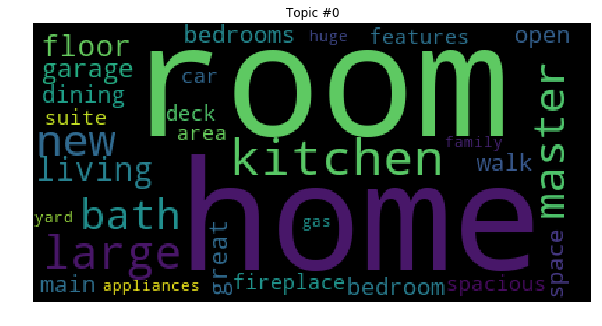

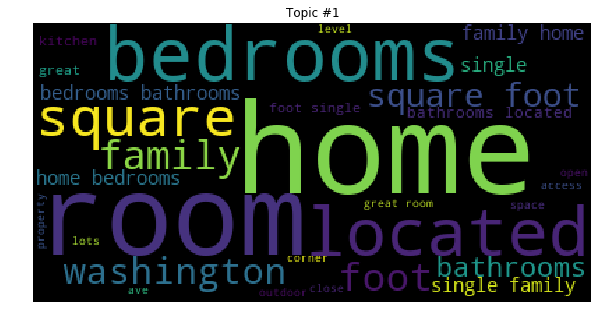

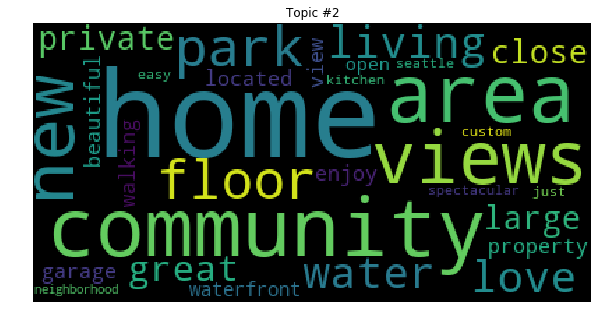

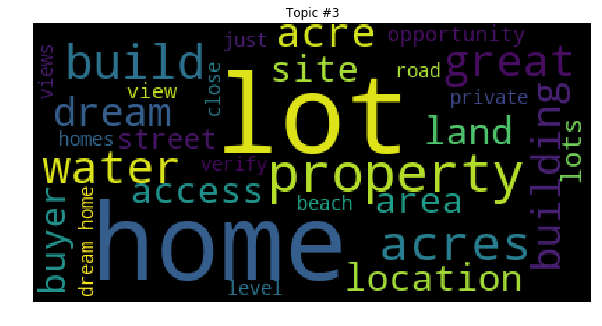

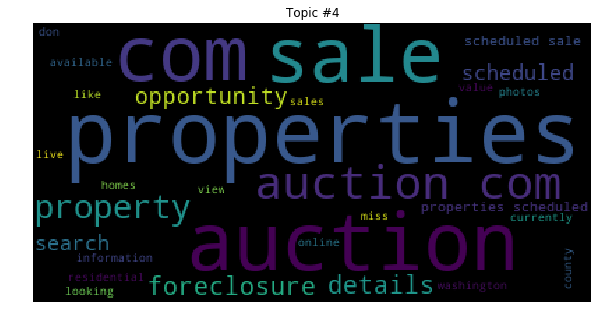

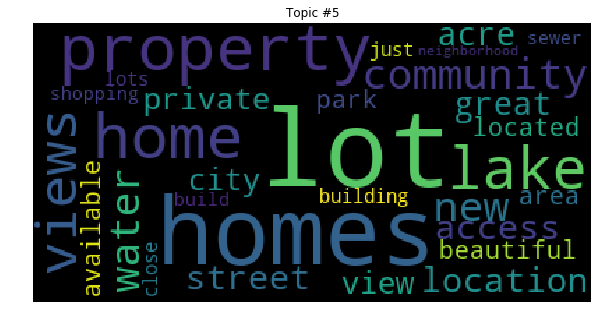

In [178]:
num_words = 30 # Number of words to include in word cloud
for t in range(lda.num_topics):
    plt.figure(figsize=(10,8))
    plt.imshow(WordCloud().fit_words(dict(lda.show_topic(t, num_words))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

I want to remove some of the over used or meaningless words like "great", "lots", "home", "love", "room", "ft", "foot", "square foot", "com", "search", "details", "large", "perfect", "main", "area", "space", "floor", "located", "beautiful", "enjoy", "one", "easy", "location", "property", "properties", "throughout", "including", "features", "also", "many", "offer", "available", "like", "currently", "ready", "time", "bonus", "come", "information", "calisto", "less", "selected", "westridge", "square", "found", "see", "additional", "homes", "find", "sale", "sales", "design".

In [125]:
nltk_stopwords = stopwords.words("english")+["great", "lots", "home", "love", "room", "ft",
                                             "foot", "square foot", "com", "search", "details",
                                             "large", "perfect", "main", "area", "space", "floor",
                                             "located", "beautiful", "enjoy", "one", "easy",
                                             "location", "property", "properties", "throughout",
                                             "including", "features","also", "many", "offer",
                                             "available", "like", "currently", "ready", "time",
                                             "bonus", "come", "information", "calisto", "less",
                                             "selected", "westridge", "square", "found", "see",
                                             "additional", "homes", "find","sale", "sales",
                                             "design"]

In [126]:
count_vectorizer = CountVectorizer(ngram_range=(1, 2), 
                                   stop_words=nltk_stopwords,
                                   token_pattern="\\b[a-z][a-z]+\\b")
count_vectorizer.fit(desc)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None,
        stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs',...d', 'westridge', 'square', 'found', 'see', 'additional', 'homes', 'find', 'sale', 'sales', 'design'],
        strip_accents=None, token_pattern='\\b[a-z][a-z]+\\b',
        tokenizer=None, vocabulary=None)

In [127]:
counts = count_vectorizer.transform(desc).transpose()

In [128]:
counts.shape

(76717, 2639)

In [129]:
# Convert sparse matrix of counts to a gensim corpus
corpus = matutils.Sparse2Corpus(counts)

In [130]:
id2word = dict((v, k) for k, v in count_vectorizer.vocabulary_.items())

In [131]:
len(id2word)

76717

In [132]:
# Create lda model (equivalent to "fit" in sklearn)
lda = models.LdaModel(corpus=corpus, num_topics=6, minimum_probability=.03, id2word=id2word, passes=10)

2018-02-28 14:17:40,959 : INFO : using symmetric alpha at 0.16666666666666666
2018-02-28 14:17:40,963 : INFO : using symmetric eta at 0.16666666666666666
2018-02-28 14:17:40,984 : INFO : using serial LDA version on this node
2018-02-28 14:17:43,187 : INFO : running online (multi-pass) LDA training, 6 topics, 10 passes over the supplied corpus of 2639 documents, updating model once every 2000 documents, evaluating perplexity every 2639 documents, iterating 50x with a convergence threshold of 0.001000
2018-02-28 14:17:43,237 : INFO : PROGRESS: pass 0, at document #2000/2639
2018-02-28 14:17:46,591 : INFO : merging changes from 2000 documents into a model of 2639 documents
2018-02-28 14:17:46,998 : INFO : topic #3 (0.167): 0.004*"new" + 0.004*"kitchen" + 0.003*"lot" + 0.003*"master" + 0.003*"open" + 0.003*"views" + 0.002*"living" + 0.002*"bedroom" + 0.002*"garage" + 0.002*"bath"
2018-02-28 14:17:47,000 : INFO : topic #4 (0.167): 0.003*"new" + 0.003*"kitchen" + 0.003*"lot" + 0.002*"lake" +

2018-02-28 14:18:02,014 : INFO : topic #3 (0.167): 0.009*"new" + 0.005*"kitchen" + 0.004*"garage" + 0.004*"master" + 0.003*"bath" + 0.003*"living" + 0.003*"appliances" + 0.003*"lot" + 0.003*"bedroom" + 0.003*"open"
2018-02-28 14:18:02,018 : INFO : topic #1 (0.167): 0.013*"auction" + 0.006*"opportunity" + 0.006*"lot" + 0.005*"foreclosure" + 0.004*"scheduled" + 0.003*"view" + 0.003*"build" + 0.003*"county" + 0.003*"value" + 0.002*"residential"
2018-02-28 14:18:02,025 : INFO : topic diff=0.353960, rho=0.481153
2018-02-28 14:18:02,080 : INFO : PROGRESS: pass 3, at document #2000/2639
2018-02-28 14:18:03,840 : INFO : merging changes from 2000 documents into a model of 2639 documents
2018-02-28 14:18:04,761 : INFO : topic #1 (0.167): 0.012*"auction" + 0.005*"lot" + 0.005*"opportunity" + 0.005*"foreclosure" + 0.003*"scheduled" + 0.003*"view" + 0.003*"build" + 0.003*"county" + 0.002*"acre" + 0.002*"residential"
2018-02-28 14:18:04,764 : INFO : topic #5 (0.167): 0.006*"kitchen" + 0.006*"master"

2018-02-28 14:18:16,500 : INFO : topic #0 (0.167): 0.005*"kitchen" + 0.004*"living" + 0.004*"master" + 0.003*"bath" + 0.003*"garage" + 0.003*"views" + 0.003*"walk" + 0.003*"new" + 0.002*"custom" + 0.002*"car"
2018-02-28 14:18:16,502 : INFO : topic #2 (0.167): 0.005*"family" + 0.005*"bedrooms" + 0.004*"washington" + 0.004*"new" + 0.003*"bathrooms" + 0.003*"bedrooms bathrooms" + 0.003*"living" + 0.003*"single" + 0.003*"single family" + 0.003*"kitchen"
2018-02-28 14:18:16,505 : INFO : topic #3 (0.167): 0.009*"new" + 0.005*"kitchen" + 0.004*"garage" + 0.003*"master" + 0.003*"bath" + 0.003*"appliances" + 0.003*"living" + 0.003*"bedroom" + 0.003*"lot" + 0.002*"close"
2018-02-28 14:18:16,510 : INFO : topic diff=0.171173, rho=0.369623
2018-02-28 14:18:16,564 : INFO : PROGRESS: pass 6, at document #2000/2639
2018-02-28 14:18:18,181 : INFO : merging changes from 2000 documents into a model of 2639 documents
2018-02-28 14:18:18,555 : INFO : topic #5 (0.167): 0.007*"kitchen" + 0.006*"master" + 0.0

2018-02-28 14:18:28,633 : INFO : topic #1 (0.167): 0.013*"auction" + 0.006*"lot" + 0.006*"foreclosure" + 0.006*"opportunity" + 0.004*"scheduled" + 0.003*"view" + 0.003*"build" + 0.003*"county" + 0.003*"residential" + 0.003*"value"
2018-02-28 14:18:28,636 : INFO : topic #4 (0.167): 0.005*"lot" + 0.004*"water" + 0.004*"acres" + 0.003*"land" + 0.003*"view" + 0.003*"build" + 0.002*"lake" + 0.002*"building" + 0.002*"level" + 0.002*"site"
2018-02-28 14:18:28,639 : INFO : topic #5 (0.167): 0.007*"kitchen" + 0.007*"master" + 0.006*"bath" + 0.005*"living" + 0.004*"walk" + 0.004*"dining" + 0.004*"open" + 0.004*"suite" + 0.003*"bedroom" + 0.003*"fireplace"
2018-02-28 14:18:28,642 : INFO : topic #2 (0.167): 0.005*"family" + 0.005*"bedrooms" + 0.004*"washington" + 0.003*"bathrooms" + 0.003*"new" + 0.003*"bedrooms bathrooms" + 0.003*"single" + 0.003*"living" + 0.003*"single family" + 0.003*"kitchen"
2018-02-28 14:18:28,646 : INFO : topic diff=0.130167, rho=0.311294
2018-02-28 14:18:28,702 : INFO : P

In [133]:
lda.print_topics()

2018-02-28 14:18:32,617 : INFO : topic #0 (0.167): 0.005*"kitchen" + 0.004*"living" + 0.004*"master" + 0.003*"bath" + 0.003*"garage" + 0.003*"views" + 0.003*"walk" + 0.003*"custom" + 0.002*"private" + 0.002*"car"
2018-02-28 14:18:32,621 : INFO : topic #1 (0.167): 0.013*"auction" + 0.006*"lot" + 0.006*"foreclosure" + 0.006*"opportunity" + 0.004*"scheduled" + 0.003*"view" + 0.003*"build" + 0.003*"county" + 0.003*"residential" + 0.003*"value"
2018-02-28 14:18:32,624 : INFO : topic #2 (0.167): 0.005*"family" + 0.005*"bedrooms" + 0.004*"washington" + 0.004*"bathrooms" + 0.003*"new" + 0.003*"bedrooms bathrooms" + 0.003*"single" + 0.003*"living" + 0.003*"single family" + 0.003*"kitchen"
2018-02-28 14:18:32,628 : INFO : topic #3 (0.167): 0.010*"new" + 0.005*"kitchen" + 0.004*"garage" + 0.003*"master" + 0.003*"bath" + 0.003*"appliances" + 0.003*"living" + 0.003*"bedroom" + 0.003*"lot" + 0.002*"floors"
2018-02-28 14:18:32,632 : INFO : topic #4 (0.167): 0.005*"lot" + 0.004*"water" + 0.004*"acres"

[(0,
  '0.005*"kitchen" + 0.004*"living" + 0.004*"master" + 0.003*"bath" + 0.003*"garage" + 0.003*"views" + 0.003*"walk" + 0.003*"custom" + 0.002*"private" + 0.002*"car"'),
 (1,
  '0.013*"auction" + 0.006*"lot" + 0.006*"foreclosure" + 0.006*"opportunity" + 0.004*"scheduled" + 0.003*"view" + 0.003*"build" + 0.003*"county" + 0.003*"residential" + 0.003*"value"'),
 (2,
  '0.005*"family" + 0.005*"bedrooms" + 0.004*"washington" + 0.004*"bathrooms" + 0.003*"new" + 0.003*"bedrooms bathrooms" + 0.003*"single" + 0.003*"living" + 0.003*"single family" + 0.003*"kitchen"'),
 (3,
  '0.010*"new" + 0.005*"kitchen" + 0.004*"garage" + 0.003*"master" + 0.003*"bath" + 0.003*"appliances" + 0.003*"living" + 0.003*"bedroom" + 0.003*"lot" + 0.002*"floors"'),
 (4,
  '0.005*"lot" + 0.004*"water" + 0.004*"acres" + 0.003*"land" + 0.003*"view" + 0.003*"build" + 0.002*"lake" + 0.002*"building" + 0.002*"level" + 0.002*"site"'),
 (5,
  '0.007*"kitchen" + 0.007*"master" + 0.006*"bath" + 0.005*"living" + 0.004*"walk" 

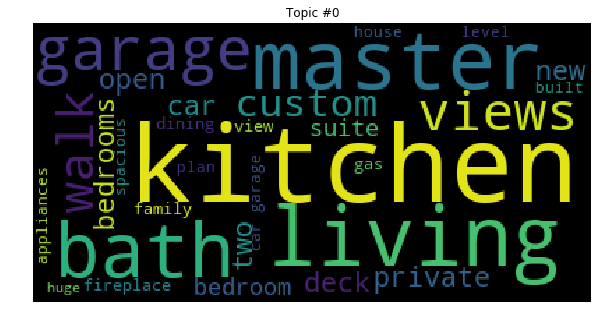

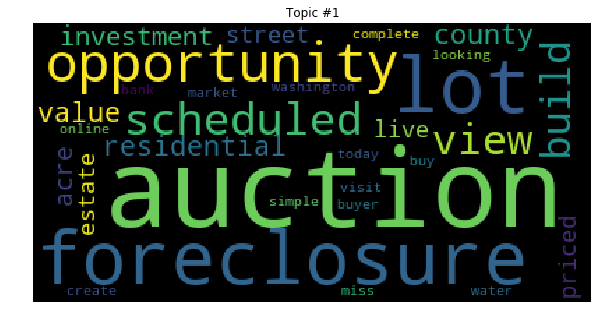

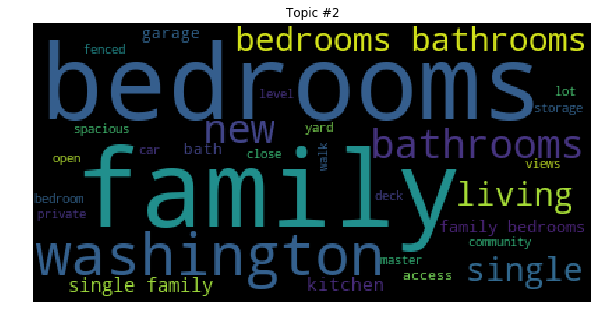

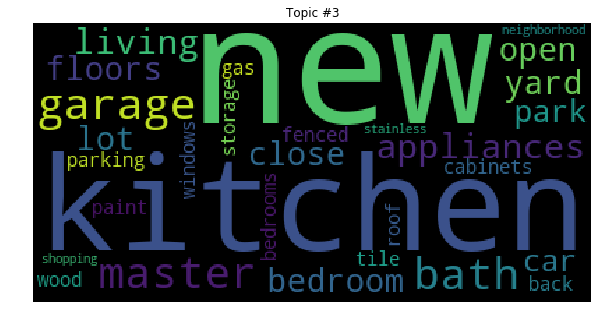

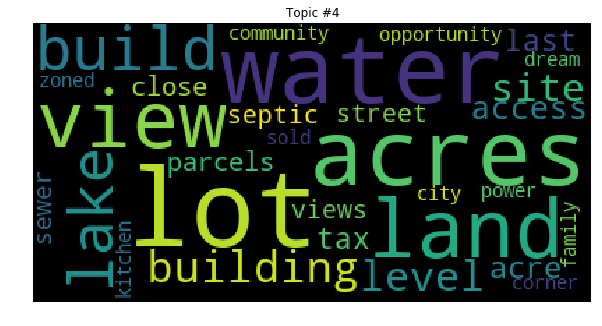

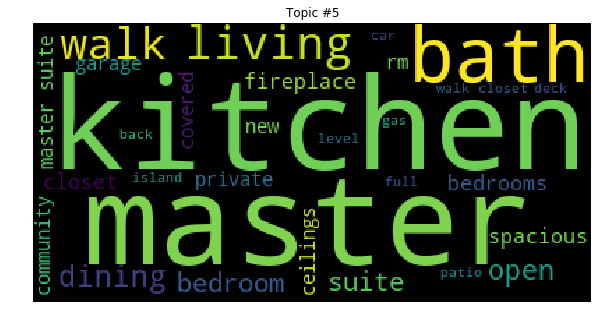

In [160]:
num_words = 30 # Number of words to include in word cloud
for t in range(lda.num_topics):
    plt.figure(figsize=(10,8))
    plt.imshow(WordCloud().fit_words(dict(lda.show_topic(t, num_words))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

In [195]:
count_vectorizer = CountVectorizer(ngram_range=(1, 2), 
                                   stop_words='english',
                                   max_df = .1,
                                   token_pattern="\\b[a-z][a-z]+\\b")
count_vectorizer.fit(desc)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.1, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='\\b[a-z][a-z]+\\b',
        tokenizer=None, vocabulary=None)

In [196]:
counts = count_vectorizer.transform(desc).transpose()

In [197]:
# Convert sparse matrix of counts to a gensim corpus
corpus = matutils.Sparse2Corpus(counts)

In [198]:
id2word = dict((v, k) for k, v in count_vectorizer.vocabulary_.items())

In [199]:
# Create lda model (equivalent to "fit" in sklearn)
lda = models.LdaModel(corpus=corpus, num_topics=6, minimum_probability=.03, id2word=id2word, passes=10)

2018-03-01 13:35:52,640 : INFO : using symmetric alpha at 0.16666666666666666
2018-03-01 13:35:52,643 : INFO : using symmetric eta at 0.16666666666666666
2018-03-01 13:35:52,656 : INFO : using serial LDA version on this node
2018-03-01 13:35:54,972 : INFO : running online (multi-pass) LDA training, 6 topics, 10 passes over the supplied corpus of 2639 documents, updating model once every 2000 documents, evaluating perplexity every 2639 documents, iterating 50x with a convergence threshold of 0.001000
2018-03-01 13:35:55,033 : INFO : PROGRESS: pass 0, at document #2000/2639
2018-03-01 13:35:58,378 : INFO : merging changes from 2000 documents into a model of 2639 documents
2018-03-01 13:35:58,819 : INFO : topic #2 (0.167): 0.002*"seattle" + 0.001*"sq" + 0.001*"floor plan" + 0.001*"sq ft" + 0.001*"downtown" + 0.001*"stainless" + 0.001*"high" + 0.001*"end" + 0.001*"tub" + 0.001*"building"
2018-03-01 13:35:58,822 : INFO : topic #3 (0.167): 0.002*"square" + 0.001*"bathrooms" + 0.001*"bonus" +

2018-03-01 13:36:12,953 : INFO : topic #0 (0.167): 0.018*"properties" + 0.016*"auction" + 0.014*"sale" + 0.014*"com" + 0.013*"auction com" + 0.007*"details" + 0.007*"foreclosure" + 0.004*"search" + 0.004*"scheduled" + 0.004*"scheduled sale"
2018-03-01 13:36:12,956 : INFO : topic #1 (0.167): 0.002*"shop" + 0.002*"rv" + 0.002*"fully" + 0.002*"quiet" + 0.002*"perfect" + 0.002*"sq" + 0.002*"schools" + 0.001*"bonus" + 0.001*"build" + 0.001*"island"
2018-03-01 13:36:12,958 : INFO : topic #3 (0.167): 0.004*"square" + 0.004*"foot" + 0.004*"bathrooms" + 0.004*"square foot" + 0.003*"bedrooms bathrooms" + 0.003*"home bedrooms" + 0.003*"single" + 0.003*"bathrooms located" + 0.003*"family home" + 0.003*"single family"
2018-03-01 13:36:12,962 : INFO : topic #2 (0.167): 0.002*"land" + 0.002*"sq" + 0.002*"sq ft" + 0.001*"buyer" + 0.001*"year" + 0.001*"seattle" + 0.001*"vacant" + 0.001*"home located" + 0.001*"waterfront" + 0.001*"building"
2018-03-01 13:36:12,968 : INFO : topic diff=0.367048, rho=0.481

2018-03-01 13:36:24,953 : INFO : topic diff=0.193791, rho=0.369623
2018-03-01 13:36:26,390 : INFO : -9.763 per-word bound, 868.7 perplexity estimate based on a held-out corpus of 639 documents with 52948 words
2018-03-01 13:36:26,392 : INFO : PROGRESS: pass 5, at document #2639/2639
2018-03-01 13:36:26,749 : INFO : merging changes from 639 documents into a model of 2639 documents
2018-03-01 13:36:26,918 : INFO : topic #2 (0.167): 0.002*"land" + 0.002*"sq" + 0.002*"sq ft" + 0.001*"buyer" + 0.001*"seattle" + 0.001*"year" + 0.001*"vacant" + 0.001*"home located" + 0.001*"waterfront" + 0.001*"building"
2018-03-01 13:36:26,921 : INFO : topic #0 (0.167): 0.019*"properties" + 0.016*"auction" + 0.014*"sale" + 0.014*"com" + 0.014*"auction com" + 0.007*"details" + 0.007*"foreclosure" + 0.005*"search" + 0.004*"scheduled" + 0.004*"scheduled sale"
2018-03-01 13:36:26,924 : INFO : topic #4 (0.167): 0.002*"tile" + 0.002*"main floor" + 0.002*"bonus" + 0.002*"walk closet" + 0.002*"island" + 0.002*"cabin

2018-03-01 13:36:36,480 : INFO : topic #4 (0.167): 0.002*"tile" + 0.002*"main floor" + 0.002*"walk closet" + 0.002*"stainless" + 0.002*"bonus" + 0.002*"island" + 0.002*"cabinets" + 0.002*"unit" + 0.002*"offers" + 0.002*"great room"
2018-03-01 13:36:36,483 : INFO : topic #0 (0.167): 0.017*"properties" + 0.015*"auction" + 0.013*"com" + 0.013*"sale" + 0.013*"auction com" + 0.006*"details" + 0.006*"foreclosure" + 0.004*"search" + 0.004*"scheduled" + 0.004*"scheduled sale"
2018-03-01 13:36:36,486 : INFO : topic diff=0.141530, rho=0.311294
2018-03-01 13:36:37,903 : INFO : -9.701 per-word bound, 832.4 perplexity estimate based on a held-out corpus of 639 documents with 52948 words
2018-03-01 13:36:37,904 : INFO : PROGRESS: pass 8, at document #2639/2639
2018-03-01 13:36:38,232 : INFO : merging changes from 639 documents into a model of 2639 documents
2018-03-01 13:36:38,390 : INFO : topic #5 (0.167): 0.003*"build" + 0.003*"building" + 0.003*"land" + 0.002*"site" + 0.002*"city" + 0.002*"ready"

In [200]:
lda.print_topics()

2018-03-01 13:36:42,138 : INFO : topic #0 (0.167): 0.019*"properties" + 0.016*"auction" + 0.015*"com" + 0.014*"sale" + 0.014*"auction com" + 0.007*"details" + 0.007*"foreclosure" + 0.005*"search" + 0.005*"scheduled" + 0.004*"scheduled sale"
2018-03-01 13:36:42,146 : INFO : topic #1 (0.167): 0.002*"shop" + 0.002*"rv" + 0.002*"fully" + 0.002*"perfect" + 0.002*"quiet" + 0.002*"sq" + 0.001*"schools" + 0.001*"bonus" + 0.001*"sq ft" + 0.001*"tub"
2018-03-01 13:36:42,149 : INFO : topic #2 (0.167): 0.002*"land" + 0.002*"sq" + 0.002*"sq ft" + 0.001*"seattle" + 0.001*"buyer" + 0.001*"year" + 0.001*"vacant" + 0.001*"home located" + 0.001*"waterfront" + 0.001*"downtown"
2018-03-01 13:36:42,154 : INFO : topic #3 (0.167): 0.004*"square" + 0.004*"foot" + 0.004*"bathrooms" + 0.004*"square foot" + 0.003*"bedrooms bathrooms" + 0.003*"home bedrooms" + 0.003*"single" + 0.003*"bathrooms located" + 0.003*"family home" + 0.003*"single family"
2018-03-01 13:36:42,159 : INFO : topic #4 (0.167): 0.002*"tile" + 

[(0,
  '0.019*"properties" + 0.016*"auction" + 0.015*"com" + 0.014*"sale" + 0.014*"auction com" + 0.007*"details" + 0.007*"foreclosure" + 0.005*"search" + 0.005*"scheduled" + 0.004*"scheduled sale"'),
 (1,
  '0.002*"shop" + 0.002*"rv" + 0.002*"fully" + 0.002*"perfect" + 0.002*"quiet" + 0.002*"sq" + 0.001*"schools" + 0.001*"bonus" + 0.001*"sq ft" + 0.001*"tub"'),
 (2,
  '0.002*"land" + 0.002*"sq" + 0.002*"sq ft" + 0.001*"seattle" + 0.001*"buyer" + 0.001*"year" + 0.001*"vacant" + 0.001*"home located" + 0.001*"waterfront" + 0.001*"downtown"'),
 (3,
  '0.004*"square" + 0.004*"foot" + 0.004*"bathrooms" + 0.004*"square foot" + 0.003*"bedrooms bathrooms" + 0.003*"home bedrooms" + 0.003*"single" + 0.003*"bathrooms located" + 0.003*"family home" + 0.003*"single family"'),
 (4,
  '0.002*"tile" + 0.002*"main floor" + 0.002*"bonus" + 0.002*"walk closet" + 0.002*"island" + 0.002*"stainless" + 0.002*"cabinets" + 0.002*"offers" + 0.002*"gorgeous" + 0.002*"unit"'),
 (5,
  '0.003*"build" + 0.003*"build

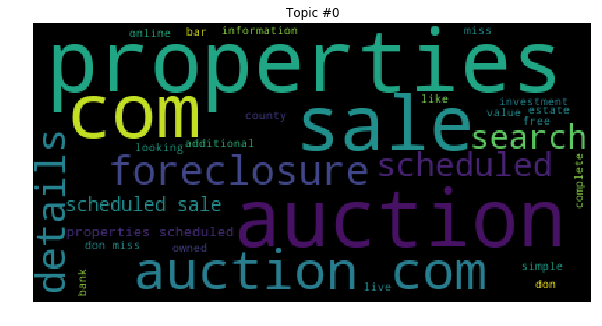

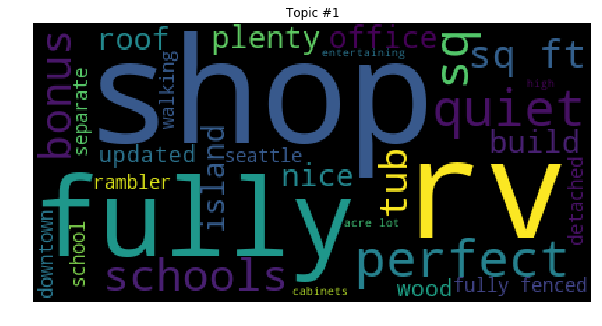

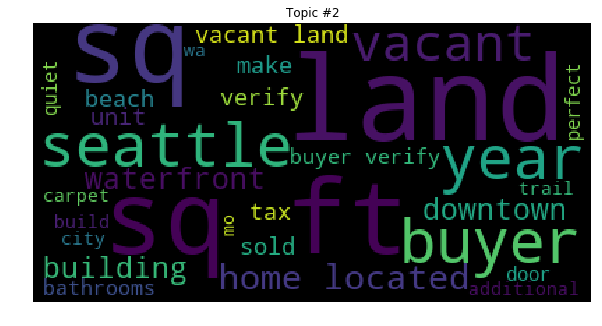

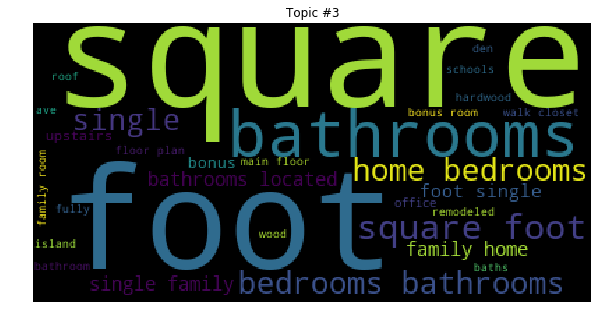

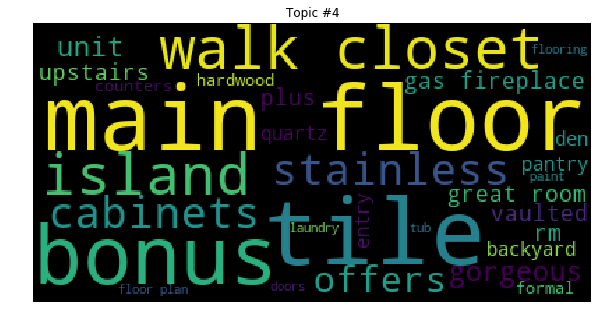

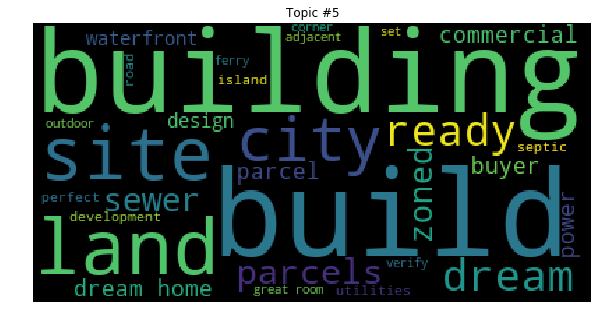

In [201]:
num_words = 30 # Number of words to include in word cloud
for t in range(lda.num_topics):
    plt.figure(figsize=(10,8))
    plt.imshow(WordCloud().fit_words(dict(lda.show_topic(t, num_words))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

In [204]:
import os
import gensim

# Setup nltk corpora path and Google Word2Vec location
google_vec_file = '/Users/gilliangoodman/Downloads/GoogleNews-vectors-negative300.bin'

In [205]:
model = gensim.models.KeyedVectors.load_word2vec_format(google_vec_file, binary=True)

2018-03-01 14:00:34,734 : INFO : loading projection weights from /Users/gilliangoodman/Downloads/GoogleNews-vectors-negative300.bin
2018-03-01 14:01:23,543 : INFO : loaded (3000000, 300) matrix from /Users/gilliangoodman/Downloads/GoogleNews-vectors-negative300.bin


In [208]:
model.most_similar('view' ,topn=4)

[('views', 0.6531245708465576),
 ('viewpoint', 0.6459956765174866),
 ('vantage_point', 0.5660992860794067),
 ('perspective', 0.532949686050415)]

In [218]:
model.similarity('ferry','island')

0.3724501153328122

In [239]:
all_desc = " ".join(desc)
all_desc = all_desc.split(" ")

In [278]:
# Build corpus from 
import os
from nltk.corpus import stopwords

stop = stopwords.words('english')
stop+=['?','!','.',',',':',';']

#creating our iterator
texts = [[word for word in document.lower().split() if word not in stop]
         for document in desc]

# An Illustration.. 


model = gensim.models.Word2Vec(texts, size=100, window=5, min_count=3, workers=2,sg=1)

2018-03-01 14:53:41,024 : INFO : collecting all words and their counts
2018-03-01 14:53:41,025 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-03-01 14:53:41,072 : INFO : collected 19565 word types from a corpus of 155127 raw words and 2639 sentences
2018-03-01 14:53:41,073 : INFO : Loading a fresh vocabulary
2018-03-01 14:53:41,095 : INFO : min_count=3 retains 5731 unique words (29% of original 19565, drops 13834)
2018-03-01 14:53:41,096 : INFO : min_count=3 leaves 138788 word corpus (89% of original 155127, drops 16339)
2018-03-01 14:53:41,119 : INFO : deleting the raw counts dictionary of 19565 items
2018-03-01 14:53:41,121 : INFO : sample=0.001 downsamples 40 most-common words
2018-03-01 14:53:41,123 : INFO : downsampling leaves estimated 130077 word corpus (93.7% of prior 138788)
2018-03-01 14:53:41,147 : INFO : estimated required memory for 5731 words and 100 dimensions: 7450300 bytes
2018-03-01 14:53:41,149 : INFO : resetting layer weights
2018-03

In [279]:
model.most_similar('view',topn=10)

/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
2018-03-01 14:53:43,208 : INFO : precomputing L2-norms of word weight vectors


[('complete', 0.8491796851158142),
 ('degree', 0.8147867918014526),
 ('partial', 0.8083032369613647),
 ('mt', 0.7952364683151245),
 ('180', 0.7934790849685669),
 ('sound.', 0.7914950251579285),
 ('spectacular', 0.7855688333511353),
 ('baker', 0.782508134841919),
 ('rainier', 0.7824915647506714),
 ('sunsets', 0.7747654914855957)]

In [283]:
model.most_similar('foreclosure',topn=10)

/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('auctions', 0.9901789426803589),
 ('online', 0.9891834259033203),
 ('sales,', 0.9756414890289307),
 ('sale.', 0.9705842733383179),
 ('107', 0.9629693627357483),
 ('18', 0.9610589146614075),
 ('bank-owned', 0.9594973921775818),
 ('69', 0.9582678079605103),
 ('83', 0.9576175808906555),
 ('agriculture', 0.9451772570610046)]

In [365]:
model.similarity('shared', 'mother')

/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.9027388042584261

In [345]:
model.most_similar('unit',topn=10)

/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('ground', 0.9052252173423767),
 ('condo.', 0.8443232774734497),
 ('bd', 0.8369665145874023),
 ('story', 0.8354068994522095),
 ('bdr,', 0.8277870416641235),
 ('sf,', 0.8263314962387085),
 ('shared', 0.8251688480377197),
 ('townhome', 0.8211939334869385),
 ('elevator', 0.8209457993507385),
 ('tri-level', 0.8191452026367188)]